<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

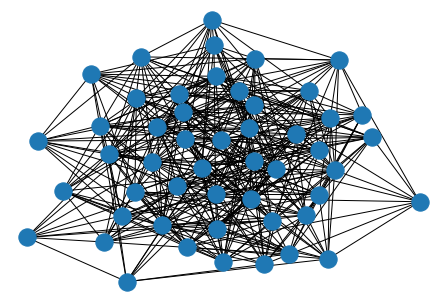

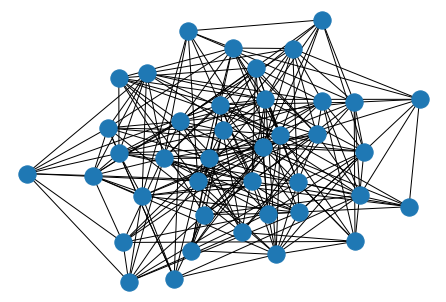

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 14: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 15: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 16: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 17: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 18: [{'Viral_load':

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]

  Agent[k].append({'Symptom' : Symptom})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {7735: [0]}, {7751: [0]}, {8788: [0]}, {9680: [0]}, {9825: [0]}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 2: [{'Viral_load': 0}, {'S': 6}, {'I': 1}, {'R': 0}, {716: [0]}, {1329: [1], 'C': 0}, {3362: [0]}, {3532: [0]}, {4999: [0]}, {7679: [0]}, {7785: [0]}], 3: [{'Viral_load': 0}, {'S': 6}, {'I': 1}, {'R': 0}, {1027: [0]}, {2784: [0]}, {3484: [0]}, {5265: [1], 'C': 0}, {7155: [0]}, {8007: [0]}, {9419: [0]}], 4: [{'Viral_load': 0}, {'S': 7}, {'I': 0}, {'R': 0}, {1261: [0]}, {1502: [0]}, {4795: [0]}, {6830: [0]}, {8111: [0]}, {8200: [0]}, {8233: [0]}], 5: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {734: [0]}, {2183: [0]}, {2577: [0]}], 6: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 0}, {2091: [0]}], 7: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {3144: [0]}, {3650: [0]}, {8304: [0]}], 8: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {1765: [0]}, {2508: [0]}, {7970: [0]}], 9: [{'Viral_load': 0}, {'S': 2}

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164]
[197, 393, 702, 1109, 1477, 2000, 2566, 3130, 3751, 4137, 4270, 4069, 3415, 2676, 1920, 1287, 833, 519, 313, 203, 139, 96, 55, 33, 21, 12, 9, 5, 3, 3, 1, 0]
[0, 0, 0, 0, 197, 393, 702, 1109, 1674, 2393, 3268, 4239, 5425, 6530, 7538, 8308, 8840, 9206, 9458, 9595, 9673, 9725, 9771, 9798, 9812, 9821, 9826, 9831, 9833, 9833, 9835, 9836]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164]]
[[], [197, 393, 702, 1109, 1477, 2000, 2566, 3130, 3751, 4137, 4270, 4069, 3415, 2676, 1920, 1287, 833, 519, 313, 203, 139, 96, 55, 33, 21, 12, 9, 5, 

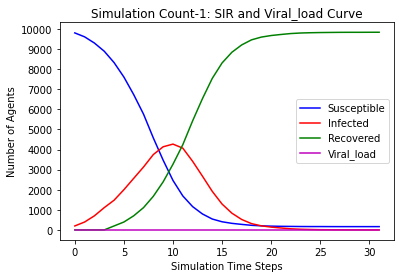

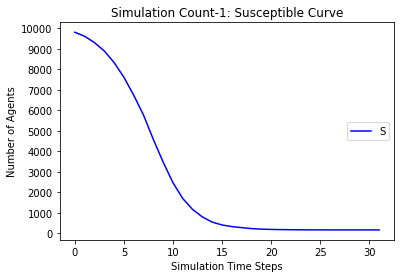

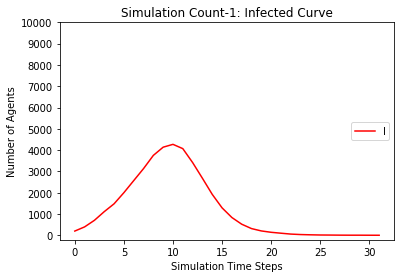

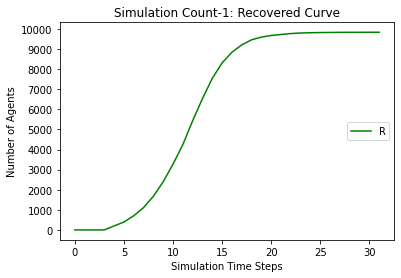

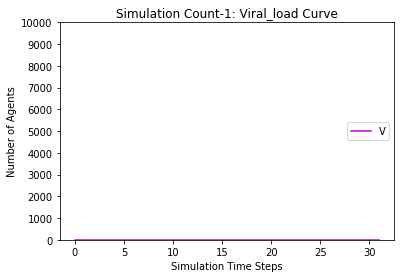

[9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 161]
[197, 398, 687, 1092, 1507, 2010, 2585, 3177, 3632, 4050, 4146, 3981, 3498, 2775, 2044, 1363, 862, 512, 318, 193, 131, 90, 57, 33, 12, 4, 2, 0]
[0, 0, 0, 0, 197, 398, 687, 1092, 1704, 2408, 3272, 4269, 5336, 6458, 7418, 8250, 8834, 9233, 9462, 9613, 9696, 9745, 9780, 9806, 9827, 9835, 9837, 9839]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 161]]
[[], [197, 393, 702, 1109, 1477, 2000, 2566, 3130, 3751, 4137, 4270, 406

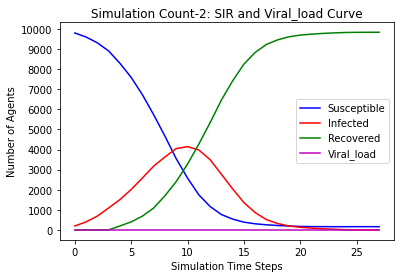

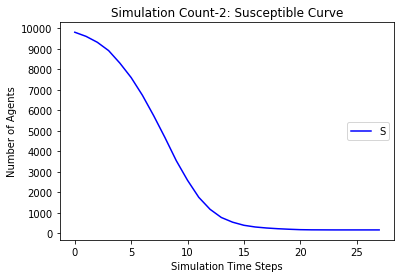

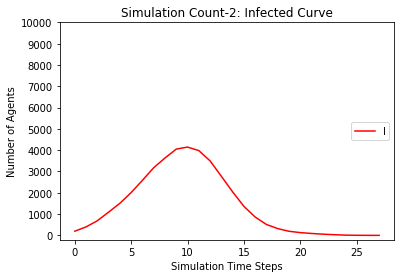

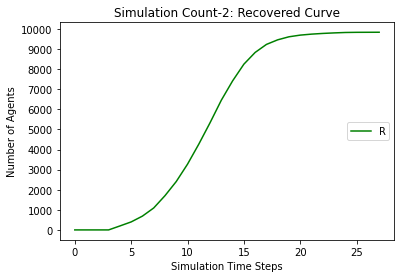

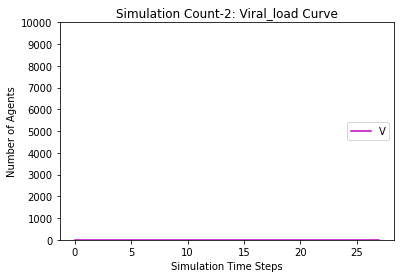

[9803, 9599, 9252, 8768, 8112, 7372, 6441, 5389, 4297, 3263, 2413, 1636, 1084, 736, 513, 372, 299, 254, 221, 207, 199, 194, 187, 182, 177, 175, 175, 175, 175, 175]
[197, 401, 748, 1232, 1691, 2227, 2811, 3379, 3815, 4109, 4028, 3753, 3213, 2527, 1900, 1264, 785, 482, 292, 165, 100, 60, 34, 25, 22, 19, 12, 7, 2, 0]
[0, 0, 0, 0, 197, 401, 748, 1232, 1888, 2628, 3559, 4611, 5703, 6737, 7587, 8364, 8916, 9264, 9487, 9628, 9701, 9746, 9779, 9793, 9801, 9806, 9813, 9818, 9823, 9825]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 161], [9803, 9599, 9252, 8768, 8112, 7

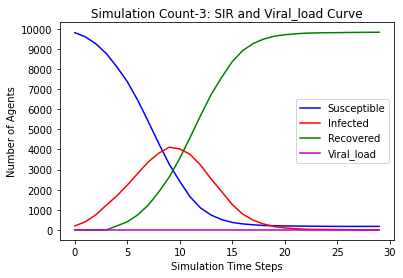

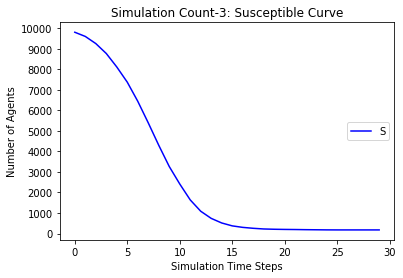

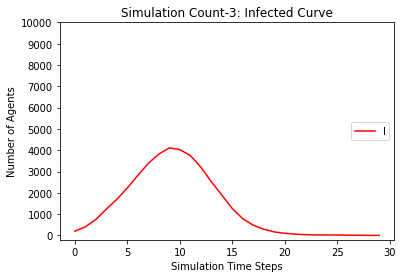

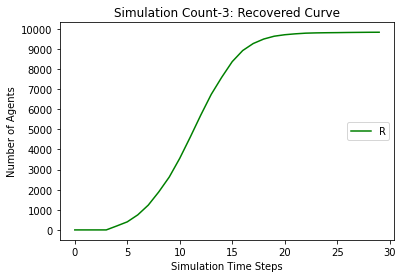

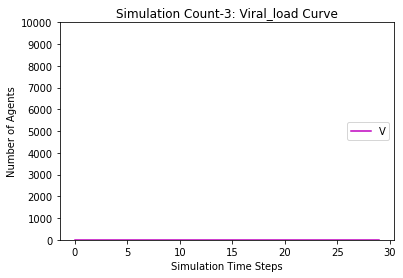

[9803, 9621, 9320, 8898, 8310, 7614, 6761, 5740, 4601, 3502, 2543, 1761, 1202, 836, 561, 419, 316, 250, 216, 204, 196, 192, 191, 190, 190, 190, 190, 190]
[197, 379, 680, 1102, 1493, 2007, 2559, 3158, 3709, 4112, 4218, 3979, 3399, 2666, 1982, 1342, 886, 586, 345, 215, 120, 58, 25, 14, 6, 2, 1, 0]
[0, 0, 0, 0, 197, 379, 680, 1102, 1690, 2386, 3239, 4260, 5399, 6498, 7457, 8239, 8798, 9164, 9439, 9581, 9684, 9750, 9784, 9796, 9804, 9808, 9809, 9810]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 161], [9803, 9599, 9252, 8768, 8112, 7372, 6441, 5389, 4297, 3263, 2413, 1636, 

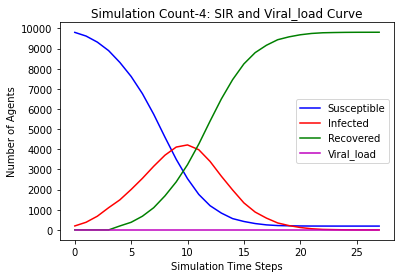

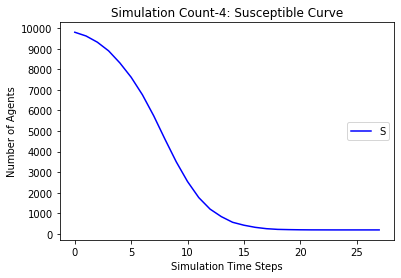

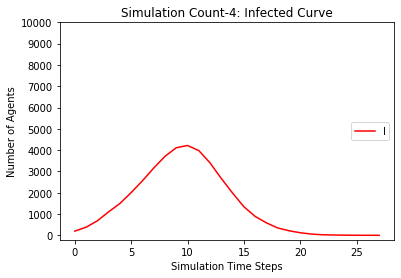

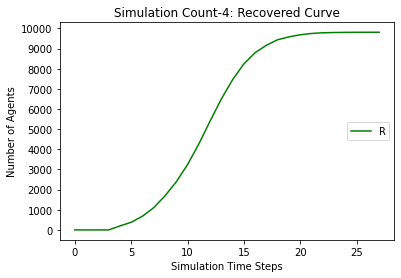

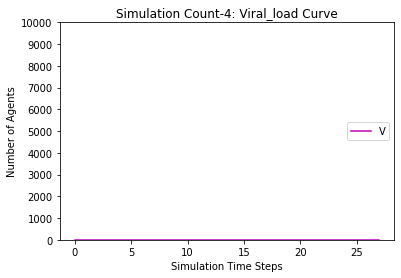

[9803, 9619, 9309, 8855, 8247, 7505, 6635, 5622, 4594, 3544, 2541, 1754, 1186, 796, 551, 410, 306, 255, 216, 202, 187, 181, 175, 169, 166, 164, 164, 164, 164, 163, 163, 163, 163, 163]
[197, 381, 691, 1145, 1556, 2114, 2674, 3233, 3653, 3961, 4094, 3868, 3408, 2748, 1990, 1344, 880, 541, 335, 208, 119, 74, 41, 33, 21, 17, 11, 5, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 197, 381, 691, 1145, 1753, 2495, 3365, 4378, 5406, 6456, 7459, 8246, 8814, 9204, 9449, 9590, 9694, 9745, 9784, 9798, 9813, 9819, 9825, 9831, 9834, 9836, 9836, 9836, 9836, 9837]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 19

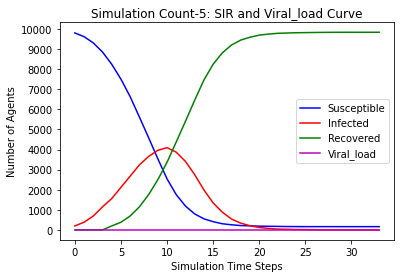

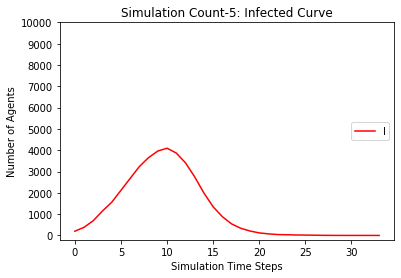

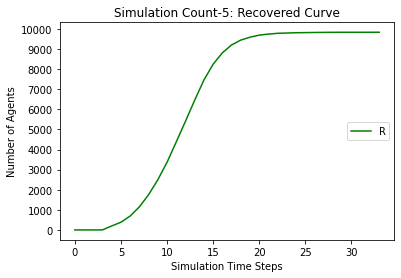

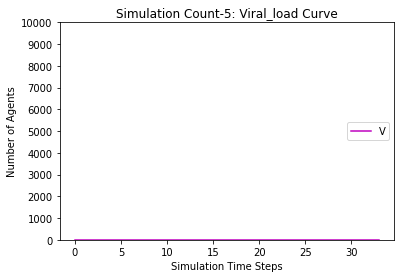

[9803, 9603, 9258, 8796, 8178, 7456, 6558, 5539, 4411, 3346, 2397, 1666, 1139, 771, 559, 417, 333, 269, 222, 197, 183, 174, 167, 164, 163, 162, 161, 159, 159, 159, 158, 158, 158, 158, 158]
[197, 397, 742, 1204, 1625, 2147, 2700, 3257, 3767, 4110, 4161, 3873, 3272, 2575, 1838, 1249, 806, 502, 337, 220, 150, 95, 55, 33, 20, 12, 6, 5, 4, 3, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 197, 397, 742, 1204, 1822, 2544, 3442, 4461, 5589, 6654, 7603, 8334, 8861, 9229, 9441, 9583, 9667, 9731, 9778, 9803, 9817, 9826, 9833, 9836, 9837, 9838, 9839, 9841, 9841, 9841, 9842]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387,

[9803, 9611, 9286, 8843, 8215, 7490, 6641, 5600, 4510, 3437, 2540, 1794, 1226, 831, 585, 405, 320, 264, 228, 201, 194, 186, 181, 176, 171, 167, 166, 165, 165, 165, 165, 165]
[197, 389, 714, 1157, 1588, 2121, 2645, 3243, 3705, 4053, 4101, 3806, 3284, 2606, 1955, 1389, 906, 567, 357, 204, 126, 78, 47, 25, 23, 19, 15, 11, 6, 2, 1, 0]
[0, 0, 0, 0, 197, 389, 714, 1157, 1785, 2510, 3359, 4400, 5490, 6563, 7460, 8206, 8774, 9169, 9415, 9595, 9680, 9736, 9772, 9799, 9806, 9814, 9819, 9824, 9829, 9833, 9834, 9835]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161,

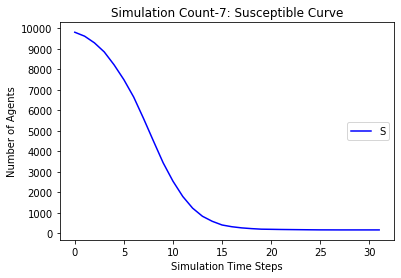

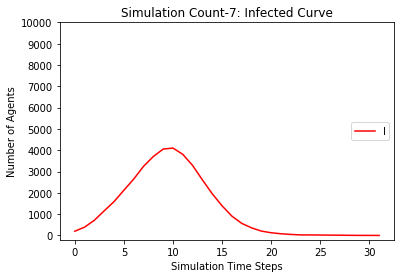

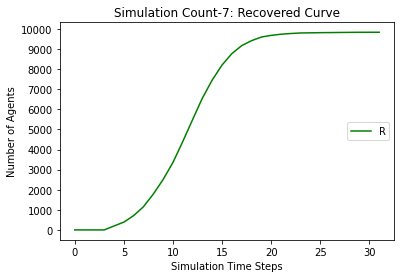

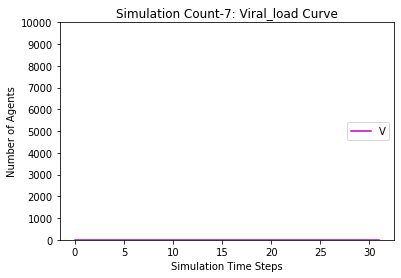

[9803, 9614, 9302, 8826, 8252, 7535, 6651, 5649, 4639, 3594, 2625, 1836, 1243, 839, 572, 417, 327, 276, 249, 233, 226, 220, 217, 215, 214, 213, 212, 212, 212, 212, 212]
[197, 386, 698, 1174, 1551, 2079, 2651, 3177, 3613, 3941, 4026, 3813, 3396, 2755, 2053, 1419, 916, 563, 323, 184, 101, 56, 32, 18, 12, 7, 5, 3, 2, 1, 0]
[0, 0, 0, 0, 197, 386, 698, 1174, 1748, 2465, 3349, 4351, 5361, 6406, 7375, 8164, 8757, 9161, 9428, 9583, 9673, 9724, 9751, 9767, 9774, 9780, 9783, 9785, 9786, 9787, 9788]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 161], [9803, 9599, 92

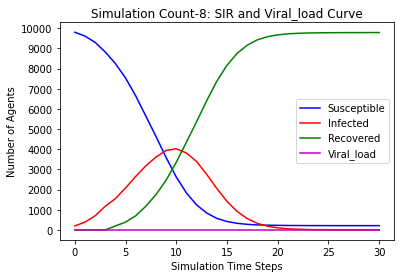

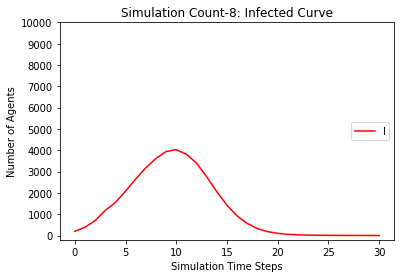

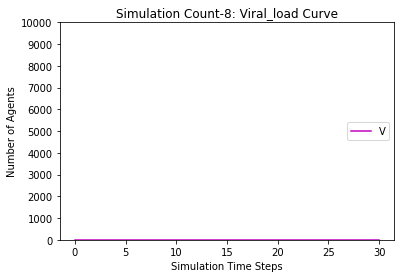

[9803, 9604, 9294, 8864, 8239, 7466, 6557, 5527, 4396, 3320, 2342, 1530, 995, 668, 458, 335, 278, 235, 216, 202, 198, 184, 181, 175, 169, 169, 167, 165, 165, 165, 165, 165]
[197, 396, 706, 1136, 1564, 2138, 2737, 3337, 3843, 4146, 4215, 3997, 3401, 2652, 1884, 1195, 717, 433, 242, 133, 80, 51, 35, 27, 29, 15, 14, 10, 4, 4, 2, 0]
[0, 0, 0, 0, 197, 396, 706, 1136, 1761, 2534, 3443, 4473, 5604, 6680, 7658, 8470, 9005, 9332, 9542, 9665, 9722, 9765, 9784, 9798, 9802, 9816, 9819, 9825, 9831, 9831, 9833, 9835]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161, 161, 161, 161, 1

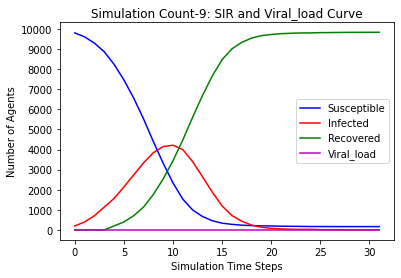

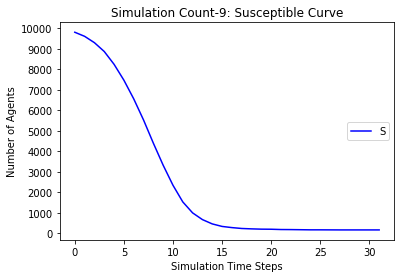

[9803, 9626, 9343, 8931, 8364, 7654, 6810, 5807, 4715, 3639, 2604, 1789, 1194, 787, 532, 376, 275, 230, 202, 186, 174, 170, 168, 166, 164, 164, 161, 161, 160, 160, 160, 160, 160]
[197, 374, 657, 1069, 1439, 1972, 2533, 3124, 3649, 4015, 4206, 4018, 3521, 2852, 2072, 1413, 919, 557, 330, 190, 101, 60, 34, 20, 10, 6, 7, 5, 4, 4, 1, 1, 0]
[0, 0, 0, 0, 197, 374, 657, 1069, 1636, 2346, 3190, 4193, 5285, 6361, 7396, 8211, 8806, 9213, 9468, 9624, 9725, 9770, 9798, 9814, 9826, 9830, 9832, 9834, 9836, 9836, 9839, 9839, 9840]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9803, 9607, 9298, 8891, 8326, 7607, 6732, 5761, 4575, 3470, 2462, 1692, 1160, 794, 542, 405, 327, 275, 229, 202, 188, 179, 174, 169, 167, 167, 165, 164, 164, 164, 164, 164], [9803, 9602, 9313, 8908, 8296, 7592, 6728, 5731, 4664, 3542, 2582, 1750, 1166, 767, 538, 387, 304, 255, 220, 194, 173, 165, 163, 161

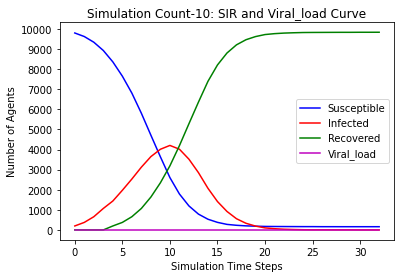

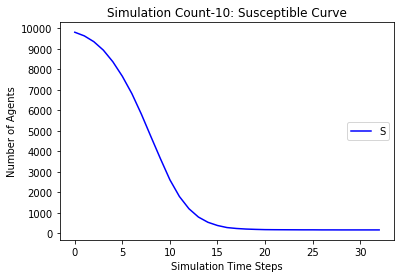

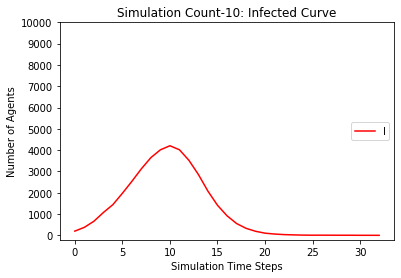

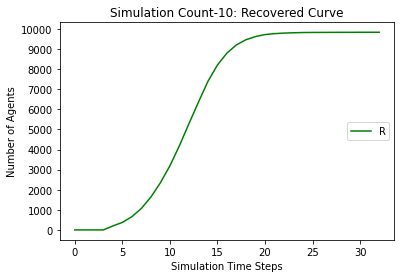

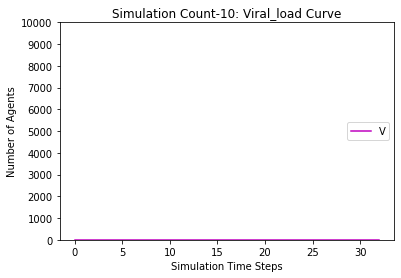

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9803, 9608.01171875, 9293.38671875, 8847.40234375, 8236.3671875, 7489.46484375, 6597.1328125, 5574.3046875, 4482.30078125, 3415.6015625, 2452.2578125, 1660.9296875, 1106.0859375, 745.59765625, 514.2734375, 373.796875, 300.86328125, 252.2421875, 226.23046875, 209.3515625, 203.05859375, 192.640625, 189.04296875, 184.4609375, 180.3828125, 179.4921875, 178.046875, 176.79296875]
Infected Average(100 Simulations): [197, 391.98828125, 706.61328125, 1152.59765625, 1566.6328125, 2118.546875, 2696.25390625, 3273.09765625, 3754.06640625, 4073.86328125, 4144.875, 3913.375, 3376.21484375, 2670.00390625, 1937.984375, 1287.1328125, 805.22265625, 493.35546875, 288.04296875, 164.4453125, 97.8046875, 59.6015625, 37.1875, 24.890625, 22.67578125, 13.1484375, 10.99609375, 7.66796875]
Recovered Average(100 Simulations): [0, 0, 0, 0, 197, 391.98828125, 706.61328125, 1152.59765625, 1763.6328125, 2510.53515625, 3402.8671875, 4425.6953125, 5517.69921875, 6584.3984375, 754

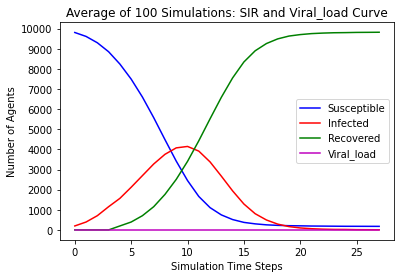

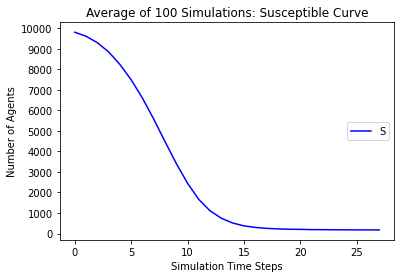

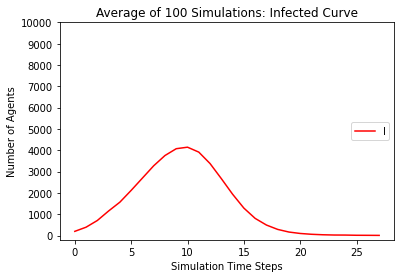

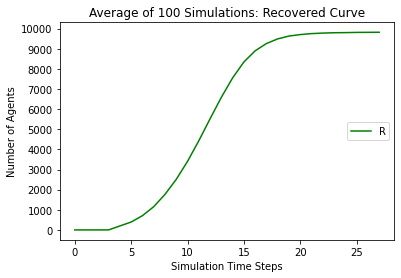

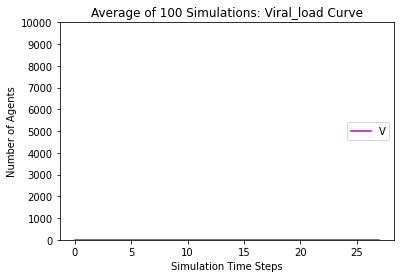

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
